In [1]:
# Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

pd.set_option('display.max_rows', 500)
%matplotlib inline
sns.set()
sns.set_style("ticks")

In [2]:
# Uploading data and adjusting data

df1 = pd.read_csv('winemag-data-130k-v2.csv', encoding='latin1')
df2 = pd.read_csv('winemag-data_first150k.csv', encoding='latin1')
df = pd.concat([df1,df2],sort = False)
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217839 entries, 0 to 217838
Data columns (total 13 columns):
country                  217777 non-null object
description              217839 non-null object
designation              153398 non-null object
points                   217839 non-null int64
price                    200724 non-null float64
province                 217777 non-null object
region_1                 182347 non-null object
region_2                 86260 non-null object
taster_name              95071 non-null object
taster_twitter_handle    90542 non-null object
title                    119988 non-null object
variety                  217838 non-null object
winery                   217839 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 21.6+ MB


In [15]:
# Adding grade based on points

def grades(points):
    if points in range(80,83):
        return 0
    elif points in range(83,87):
        return 1
    elif points in range(87,90):
        return 2
    elif points in range(90,94):
        return 3
    elif points in range(94,98):
        return 4
    else:
        return 5
    
df['grade'] = df['points'].apply(grades)

In [3]:
stopwords = set(stopwords.words('english'))

In [4]:
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

In [5]:
df["cleaned_description"] = df["description"].apply(clean_description)

word_occurrence = df["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

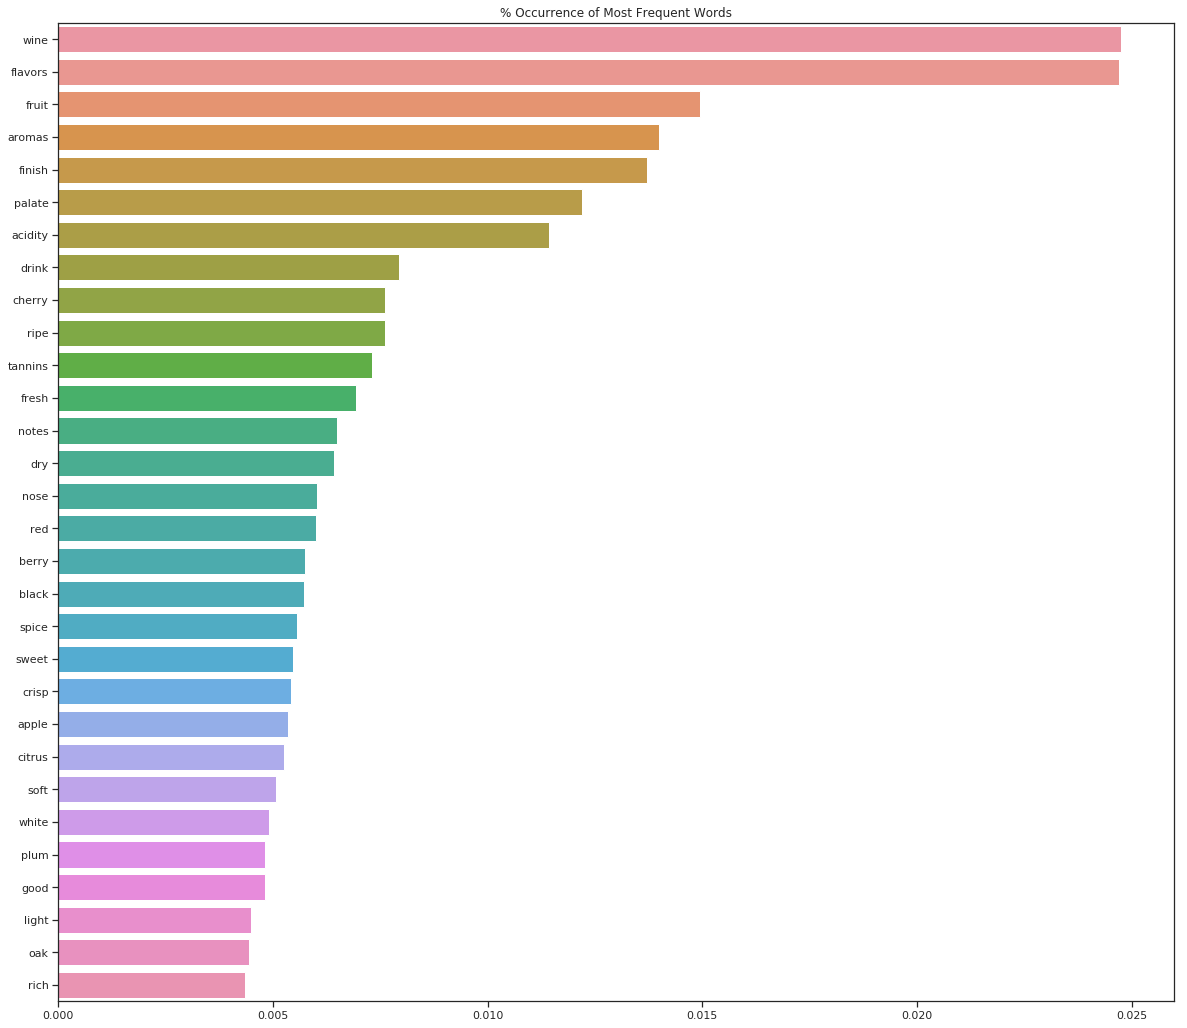

In [28]:
# plot most common words 

top_words = word_occurrence[:30]/total_words

plt.figure(figsize = (20,18))
ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

### Luxury wine vs cheap wine

In [7]:
# Creating a dataframe for luxury wines

luxury = df[df['price'] > 800 ]
luxury = luxury.reset_index(drop=True)
luxury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
country                  40 non-null object
description              40 non-null object
designation              14 non-null object
points                   40 non-null int64
price                    40 non-null float64
province                 40 non-null object
region_1                 35 non-null object
region_2                 2 non-null object
taster_name              25 non-null object
taster_twitter_handle    25 non-null object
title                    26 non-null object
variety                  40 non-null object
winery                   40 non-null object
cleaned_description      40 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 4.5+ KB


In [8]:
cheap = df[(df['price'] > 0) & (df['price'] < 25.01)]
cheap = cheap.reset_index(drop=True)
cheap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104475 entries, 0 to 104474
Data columns (total 14 columns):
country                  104439 non-null object
description              104475 non-null object
designation              65706 non-null object
points                   104475 non-null int64
price                    104475 non-null float64
province                 104439 non-null object
region_1                 81776 non-null object
region_2                 35547 non-null object
taster_name              46029 non-null object
taster_twitter_handle    43229 non-null object
title                    56431 non-null object
variety                  104474 non-null object
winery                   104475 non-null object
cleaned_description      104475 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 11.2+ MB


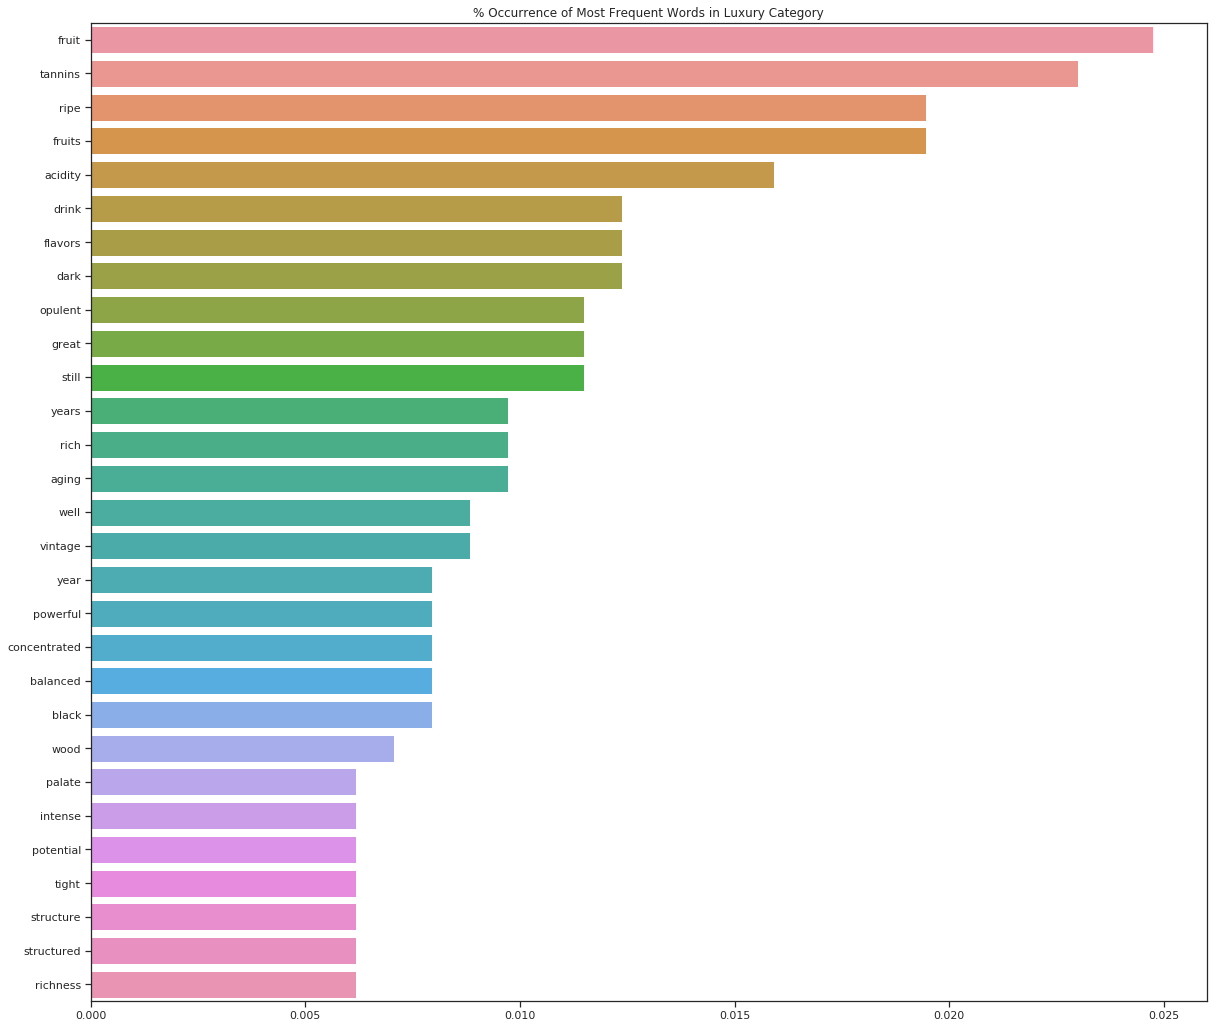

In [26]:
luxury["cleaned_description"] = luxury["description"].apply(clean_description)

word_occurrence = luxury["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

plt.figure(figsize = (20,18))
ax = sns.barplot(x = top_words.values[1:], y = top_words.index[1:])

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words in Luxury Category")

plt.show()

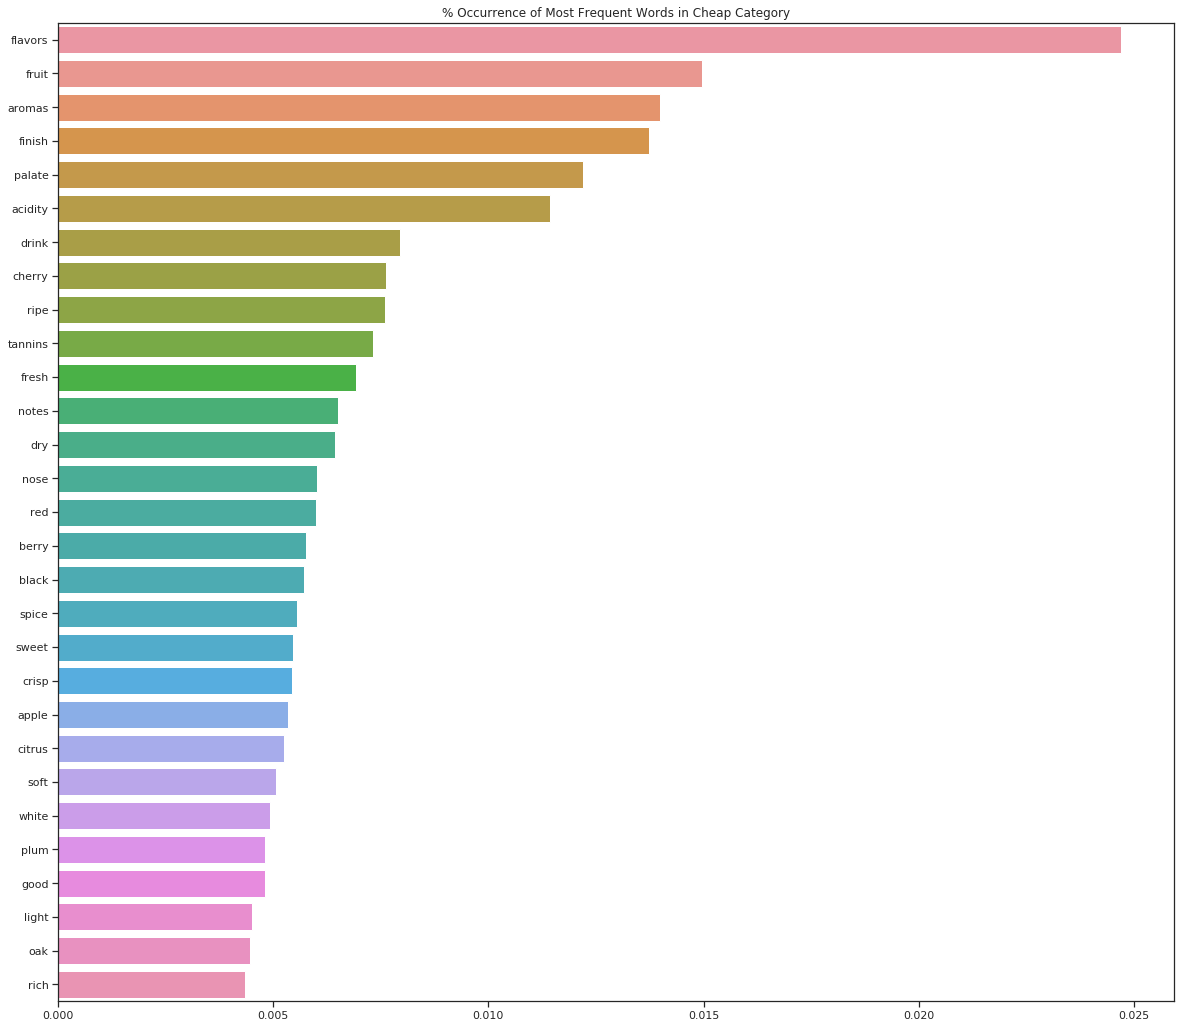

In [27]:
cheap["cleaned_description"] = cheap["description"].apply(clean_description)

word_occurrence = cheap["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

plt.figure(figsize = (20,18))
ax = sns.barplot(x = top_words.values[1:], y = top_words.index[1:])

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words in Cheap Category")

plt.show()

In [ ]:
df